<a href="https://colab.research.google.com/github/anicolaou718/Real-Estate-Pricing/blob/main/Real_Estate_Pricing_EDA_%2B_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

Importing Dataset

In [ ]:
Testdf = pd.read_csv('test.csv')
Traindf = pd.read_csv('train.csv')

In [ ]:
Testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
Traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
Testdf.shape

(1459, 80)

In [ ]:
Traindf.shape

(1460, 81)

In [ ]:
Testdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
Traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
Traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
Traindf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
Traindf.duplicated().sum()

0

In [ ]:
Testdf.duplicated().sum()

0

In [ ]:
null_test_cols = [i for i in Testdf.columns if Testdf[i].isnull().any()]
null_test_cols

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [ ]:
null_train_cols = [i for i in Traindf.columns if Traindf[i].isnull().any()]
null_train_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:

Traindf[null_train_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
Traindf["PoolQC"] = Traindf["PoolQC"].fillna("None")
Testdf["PoolQC"] = Testdf["PoolQC"].fillna("None")
Traindf["MiscFeature"] = Traindf["MiscFeature"].fillna("None")
Testdf["MiscFeature"] = Testdf["MiscFeature"].fillna("None")
Traindf["Alley"] = Traindf["Alley"].fillna("None")
Testdf["Alley"] = Testdf["Alley"].fillna("None")
Traindf["Fence"] = Traindf["Fence"].fillna("None")
Testdf["Fence"] = Testdf["Fence"].fillna("None")
Traindf["FireplaceQu"] = Traindf["FireplaceQu"].fillna("None")
Testdf["FireplaceQu"] = Testdf["FireplaceQu"].fillna("None")

In [ ]:
d=Traindf[null_train_cols].isnull().sum() > (.4 * Traindf.shape[0])

In [ ]:
i = 0
y = []
for x in Traindf[null_train_cols]:
  if d[i]==True:
    y.append(x)
  i+=1

In [ ]:
Traindf.drop(columns = y, inplace=True)

In [ ]:
Testdf.drop(columns = y, inplace=True)

Outliers

In [ ]:
import plotly.express as px
fig = px.box(Traindf, y="LotFrontage")
fig.show()

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(Traindf['LotFrontage']))
threshold = 3
outliers = Traindf[z > threshold]
print(outliers)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


<Axes: title={'center': 'Skewed Distribution'}, xlabel='LotFrontage', ylabel='Density'>

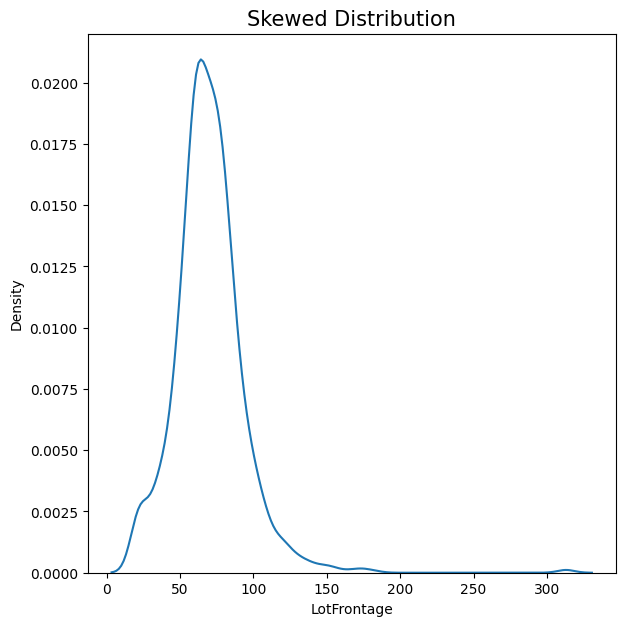

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Skewed Distribution", fontsize=15)
sns.kdeplot(data = Traindf['LotFrontage'])

In [ ]:
Q1 = Traindf['LotFrontage'].quantile(0.25)
Q3 = Traindf['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = Traindf[(Traindf['LotFrontage'] < Q1 - threshold * IQR) | (Traindf['LotFrontage'] > Q3 + threshold * IQR)]

In [ ]:
#defining max and min limits
max_limit = Q3 + (1.5 * IQR)
min_limit = Q1 - (1.5 * IQR)


In [ ]:
Traindf_skew_new = pd.DataFrame(np.where(Traindf['LotFrontage'] > max_limit, max_limit,
         (np.where(Traindf['LotFrontage'] < min_limit, min_limit, Traindf['LotFrontage']))), columns=['LotFrontage'])

<ipython-input-29-49fb260c4e93>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-29-49fb260c4e93>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




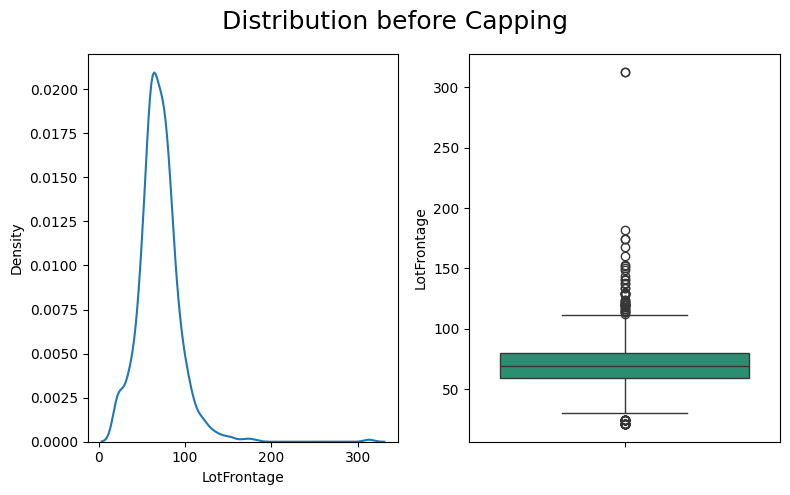

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = Traindf['LotFrontage'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = Traindf['LotFrontage'], palette="Dark2")
plt.tight_layout()
plt.show()

<ipython-input-30-663199e71e9d>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-30-663199e71e9d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




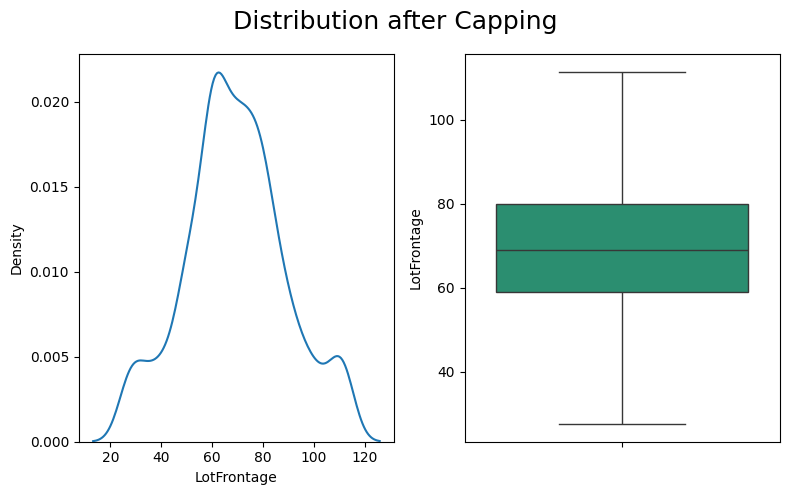

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = Traindf_skew_new['LotFrontage'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data = Traindf_skew_new['LotFrontage'], palette="Dark2")
plt.tight_layout()
plt.show()

In [ ]:
Traindf['LotFrontage']=Traindf_skew_new['LotFrontage']

In [ ]:
for x in Traindf['Neighborhood'].value_counts().index:
  print(x,Traindf[Traindf['Neighborhood'] == x]['LotFrontage'].mean())

NAmes 74.56720430107526
CollgCr 71.34126984126983
OldTown 62.321100917431195
Edwards 65.46739130434783
Somerst 64.87820512820512
Gilbert 74.43877551020408
NridgHt 81.61842105263158
Sawyer 74.36458333333333
NWAmes 81.28888888888889
SawyerW 71.36
BrkSide 56.872549019607845
Crawfor 71.35365853658537
Mitchel 69.59722222222223
NoRidge 88.03030303030303
Timber 78.11666666666666
IDOTRR 62.25
ClearCr 81.42307692307692
StoneBr 62.075
SWISU 58.91304347826087
MeadowV 32.13333333333333
Blmngtn 47.142857142857146
BrDale 27.5
Veenker 59.714285714285715
NPkVill 34.785714285714285
Blueste 27.5


In [ ]:
Testdf["LotFrontage"] = Testdf.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
Traindf["LotFrontage"] = Traindf.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
Traindf['LotFrontage'].isnull().sum()

0

In [ ]:
Traindf.iloc[:,15:35].isnull().sum()

BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
dtype: int64

In [ ]:
Traindf.iloc[:,0:15].isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
dtype: int64

In [ ]:
null_train_cols = [i for i in Traindf.columns if Traindf[i].isnull().any()]
null_train_cols

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    Traindf[col] = Traindf[col].fillna('None')
    Testdf[col] = Testdf[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    Traindf[col] = Traindf[col].fillna(0)
    Testdf[col] = Testdf[col].fillna(0)

In [ ]:
Traindf.shape

(1460, 81)

In [ ]:
Traindf.dropna(inplace=True)
Testdf.dropna(inplace=True)

In [ ]:
Traindf.drop(columns='LandContour', inplace=True)
Testdf.drop(columns='LandContour', inplace = True)

EDA plotting

In [ ]:
Traindf['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
Traindf.iloc[:,:45].corr()

<ipython-input-45-2678f8e75eac>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
Id,1.000000,0.011119,-0.022097,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,-0.005213,-0.007841,-0.016309,0.009820,0.006626,-0.044033
MSSubClass,0.011119,1.000000,-0.413393,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463
LotFrontage,-0.022097,-0.413393,1.000000,0.299670,0.244044,-0.046009,0.139428,0.077757,0.220449,0.178816,0.060543,0.146025,0.355767,0.411738,0.072630,0.015680
LotArea,-0.032789,-0.138039,0.299670,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897
OverallQual,-0.032075,0.034799,0.244044,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071
OverallCond,0.013595,-0.061147,-0.046009,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,-0.137104,-0.167932,-0.139260,0.027720,0.025099
YearBuilt,-0.016378,0.027979,0.139428,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,0.150218,0.394285,0.285655,0.009036,-0.183738
YearRemodAdd,-0.025398,0.040664,0.077757,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,0.182219,0.292985,0.243464,0.139804,-0.061980
MasVnrArea,-0.049736,0.023156,0.220449,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127
BsmtFinSF1,-0.006218,-0.069241,0.178816,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,-0.496605,0.520098,0.442838,-0.135330,-0.064447


<Axes: xlabel='SalePrice'>

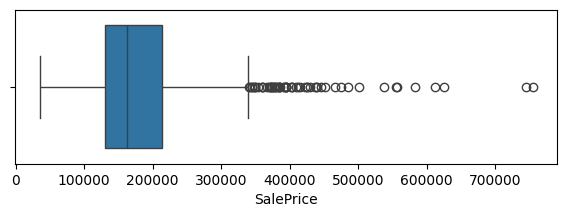

In [ ]:
plt.figure(figsize=(7,2))
sns.boxplot(x = Traindf['SalePrice'])

<ipython-input-47-446c1827976d>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-446c1827976d>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




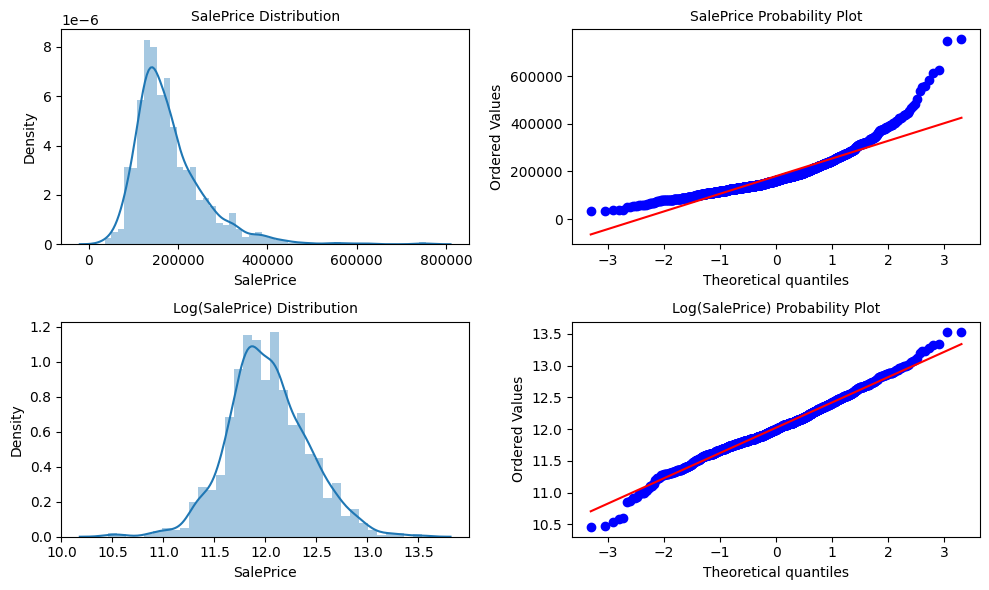

In [ ]:
#Create a figure with a grid of four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

#Plot the first graph in the upper-left subplot
#sns.histplot(np.log(Traindf_train.SalePrice), bins = 25) #As distplot is getting deprecated, will need to work with histplot or displot later
sns.distplot(Traindf['SalePrice'],  ax=axs[0, 0])
axs[0, 0].set_title('SalePrice Distribution', size=10)

#Plot the second graph in the upper-right subplot
res1 = stats.probplot(Traindf['SalePrice'], plot=axs[0, 1])
axs[0, 1].set_title('SalePrice Probability Plot', size=10)

#Checking Logarithimic distribution of SalesPrice. To bring the distribution to Normal distribution
# Plot the third graph in the lower-left subplot
sns.distplot(np.log(Traindf['SalePrice']), ax=axs[1, 0])
axs[1, 0].set_title('Log(SalePrice) Distribution', size=10)

#Plot the fourth graph in the lower-right subplot
res2 = stats.probplot(np.log(Traindf['SalePrice']), plot=axs[1, 1])
axs[1, 1].set_title('Log(SalePrice) Probability Plot', size=10)

plt.tight_layout()
plt.show()

In [ ]:
print('Skew is:', Traindf.SalePrice.skew())
print('Kurtosis:', Traindf.SalePrice.kurt())

Skew is: 1.8831110462405252
Kurtosis: 6.573025006423077


In [ ]:
print("Skew is:", np.log(Traindf.SalePrice).skew())
print("Kurtosis:", np.log(Traindf.SalePrice).kurt())

Skew is: 0.12193841342297697
Kurtosis: 0.8025375178446992


In [ ]:
Traindf.SalePrice = np.log(Traindf.SalePrice)

<ipython-input-51-f7a926b4176f>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




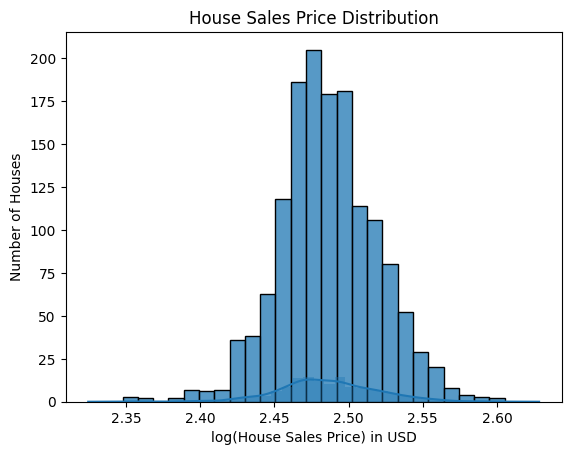

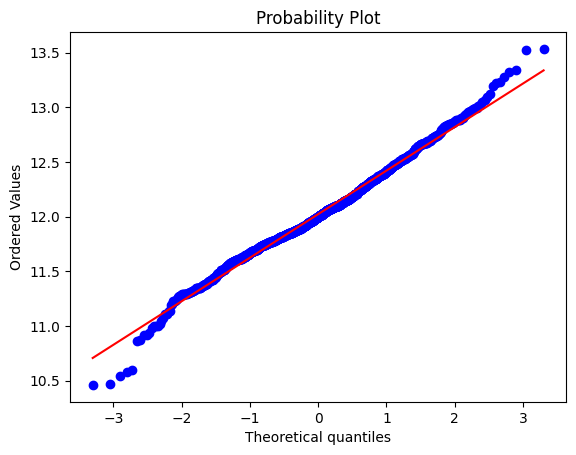

In [ ]:
sns.histplot(np.log(Traindf.SalePrice), bins = 25)
sns.distplot(np.log(Traindf['SalePrice']));
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")

fig = plt.figure()
res = stats.probplot(Traindf['SalePrice'], plot=plt)

In [ ]:
numerical_cols = [col for col in Traindf.columns if Traindf.dtypes[col] != 'object']
print("Numerical features:",len(numerical_cols), '\n', numerical_cols, '\n')

Numerical features: 38 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 



In [ ]:
pos_cor = ['OverallQual', 'GrLivArea', 'GarageCars','YearBuilt','FullBath','TotalBsmtSF']


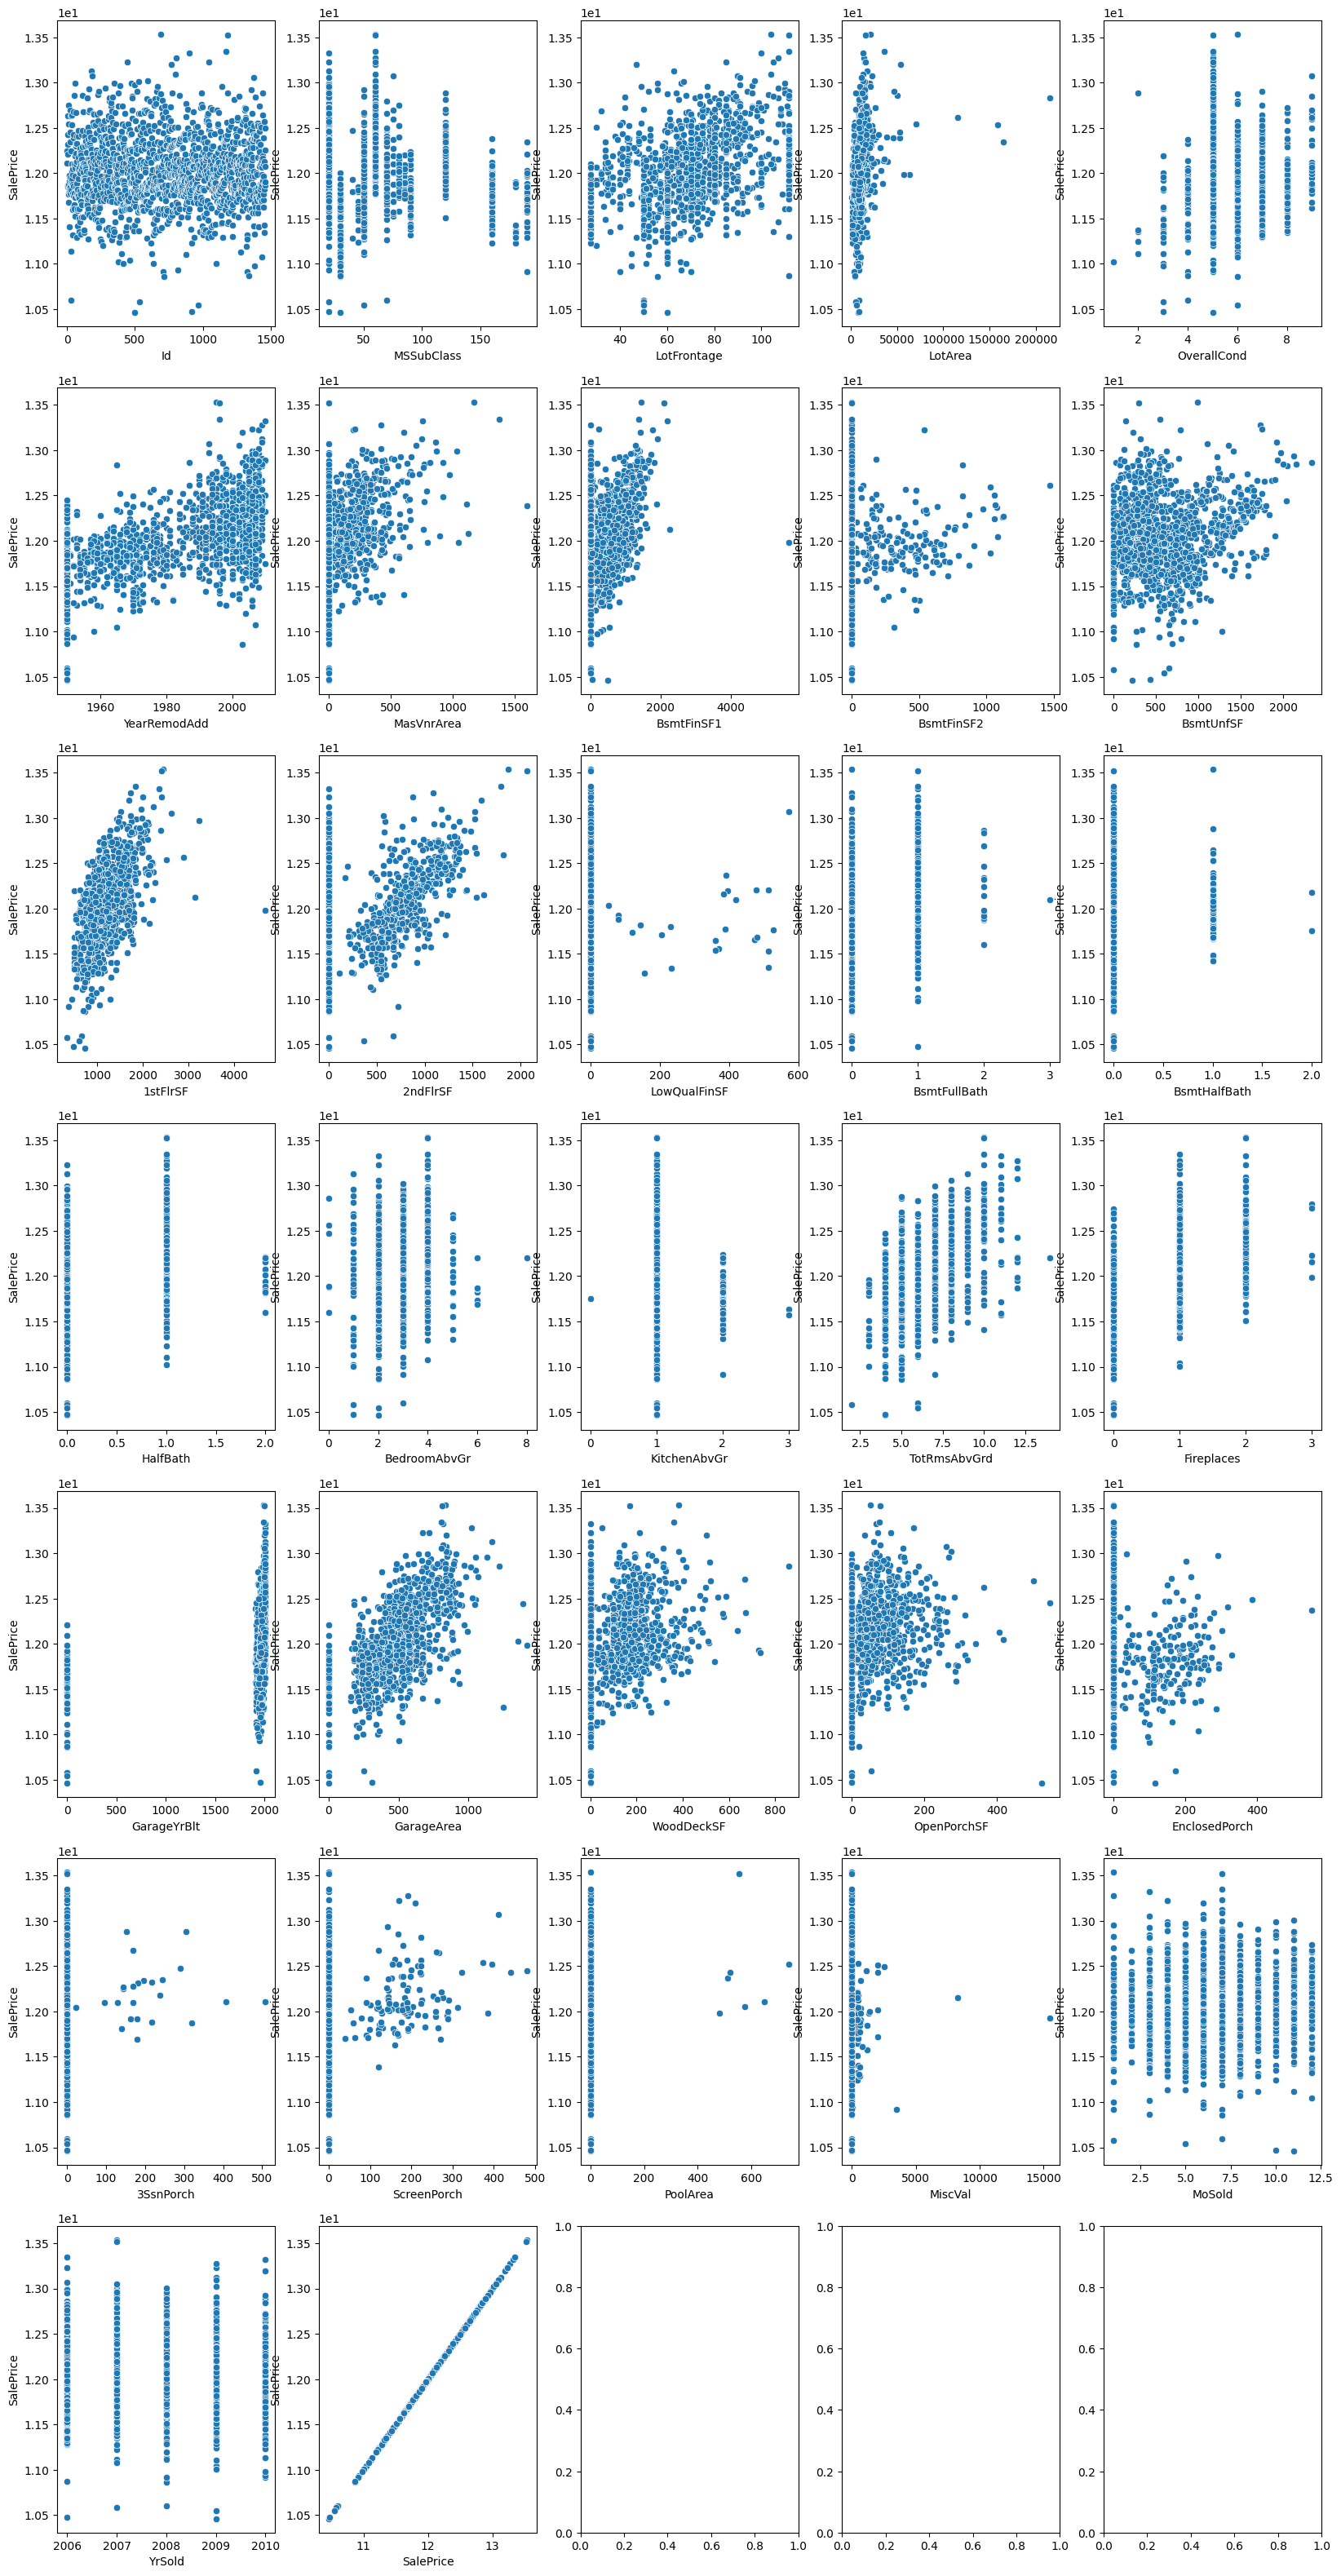

In [ ]:
#Remaining variables and their relationship with target variable:
rem_cols = [cols for cols in numerical_cols if cols not in pos_cor]

ncols = 5
nrows = int(np.ceil(len(rem_cols)/ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
for i, feature in enumerate(rem_cols, 1):
    plt.subplot(nrows, ncols, i) #rows, col, index in the grid
    sns.scatterplot(x=feature, y='SalePrice', data=Traindf)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 1)) #2: 2L
    plt.xlabel(feature)
    plt.ylabel('SalePrice')#, size=15)
plt.show()

In [ ]:
o = []
n = []
for i in Traindf.columns:
  if Traindf[i].dtype == object:
    o.append(i)
  else:
    n.append(i)
print('Objects: ', o)
print('Numeric:  ', n)

Objects:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numeric:   ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorch

In [ ]:
for i in Traindf[o]:
  print(Traindf[i].value_counts())

RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1445
Grvl       6
Name: Street, dtype: int64
None    1361
Grvl      50
Pave      40
Name: Alley, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1251
Feedr       81
Artery      48
RRAn       

In [ ]:
o.sort()
print(o, end='\n')

['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [ ]:
cols = Traindf.columns
cols.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'PoolQC', 'RoofMat

In [ ]:
#Ranked objexts
rankedcols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
              'HeatingQC','GarageFinish','GarageQual','GarageCond','PavedDrive','Electrical','HeatingQC']
#Traindf[rankedcols].info() #checking dtype
for i in Traindf[rankedcols]:
  print(Traindf[i].value_counts())

TA    905
Gd    481
Ex     51
Fa     14
Name: ExterQual, dtype: int64
TA    1273
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA      648
Gd      611
Ex      120
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      1303
Gd        64
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
No      945
Av      221
Gd      133
Mn      114
None     38
Name: BsmtExposure, dtype: int64
Unf     427
GLQ     413
ALQ     220
BLQ     148
Rec     132
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
Unf     1247
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
Ex    734
TA    427
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Unf     605
RFn     418
Fin     347
None     81
Name: GarageFinish, dtype: int64
TA      1302
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
TA      1317
None      81
Fa        35
Gd         9
Po    

In [ ]:
Testdf.HeatingQC.value_counts()

Ex    735
TA    424
Gd    232
Fa     42
Po      1
Name: HeatingQC, dtype: int64

In [ ]:
o = []
n = []
for i in Traindf.columns:
  if Traindf[i].dtype == object:
    o.append(i)
  else:
    n.append(i)
print('Objects: ', o)
print('Numeric:  ', n)

Objects:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numeric:   ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorch

In [ ]:
for i in Traindf[o]:
  print(Testdf[i].value_counts())

RL         1098
RM          241
FV           70
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Pave    1429
Grvl       5
Name: Street, dtype: int64
None    1329
Grvl      69
Pave      36
Name: Alley, dtype: int64
Reg    921
IR1    473
IR2     34
IR3      6
Name: LotShape, dtype: int64
AllPub    1434
Name: Utilities, dtype: int64
Inside     1065
Corner      242
CulDSac      81
FR2          36
FR3          10
Name: LotConfig, dtype: int64
Gtl    1372
Mod      59
Sev       3
Name: LandSlope, dtype: int64
NAmes      218
OldTown    126
CollgCr    116
Edwards     92
Somerst     89
NridgHt     88
Gilbert     81
Sawyer      76
SawyerW     66
Mitchel     63
NWAmes      58
IDOTRR      52
Crawfor     52
BrkSide     50
Timber      33
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     15
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
Norm      1235
Feedr       79
Artery      42
RRAn        21
PosN       

In [ ]:
x = ['ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','HeatingQC','GarageCond','GarageCond','KitchenQual','KitchenQual','FireplaceQu','PoolQC']

In [ ]:
Traindf['KitchenQual'].value_counts()

TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [ ]:
for i in Traindf[x]:
  Traindf[i] = Traindf[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
  Testdf[i] = Testdf[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'None':0})

In [ ]:
#Traindf.ExterQual = Traindf.ExterQual.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
#Testdf.ExterQual = Testdf.ExterQual.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1})
#Traindf.ExterCond = Traindf.ExterCond.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Testdf.ExterCond = Testdf.ExterCond.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Traindf.BsmtQual = Traindf.BsmtQual.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1})
#Testdf.BsmtQual = Testdf.BsmtQual.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1})
#Traindf.BsmtCond = Traindf.BsmtCond.replace({'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Testdf.BsmtCond = Testdf.BsmtCond.replace({'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Traindf.GarageQual = Traindf.GarageQual.replace({'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Testdf.GarageQual = Testdf.GarageQual.replace({'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Traindf.HeatingQC = Traindf.HeatingQC.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})
#Testdf.HeatingQC = Testdf.HeatingQC.replace({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0})

In [ ]:
Traindf.Street = Traindf.Street.replace({'Pave':2, 'Grvl': 1, 'None': 0})
Traindf.CentralAir = Traindf.CentralAir.replace({'Y':2, 'N': 0, 'None': 0})

In [ ]:
Testdf.Street = Testdf.Street.replace({'Pave':2, 'Grvl': 1, 'None': 0})
Testdf.CentralAir = Testdf.CentralAir.replace({'Y':2, 'N': 0, 'None': 0})

In [ ]:
Testdf.LotShape = Testdf.LotShape.replace({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
Testdf.LandSlope = Testdf.LandSlope.replace({'Gtl':2, 'Mod':1, 'Sev':0})
Testdf.BsmtExposure = Testdf.BsmtExposure.replace({'Gd':4, 'Av':3, 'Mn':2,'No':1, 'None':0})
Testdf.BsmtFinType1 = Testdf.BsmtFinType1.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
Testdf.BsmtFinType2 = Testdf.BsmtFinType2.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
Testdf.Electrical = Testdf.Electrical.replace({'SBrkr':4, 'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0})
Testdf.Functional = Testdf.Functional.replace({'Typ':6, 'Min1':5, 'Min2':4, 'Mod':3, 'Maj1':2, 'Maj2':1, 'Sev':0})
Testdf.GarageFinish = Testdf.GarageFinish.replace({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})
Testdf.PavedDrive = Testdf.PavedDrive.replace({'Y':2, 'P':1, 'N':0})

In [ ]:
Traindf.LotShape = Traindf.LotShape.replace({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
Traindf.LandSlope = Traindf.LandSlope.replace({'Gtl':2, 'Mod':1, 'Sev':0})
Traindf.BsmtExposure = Traindf.BsmtExposure.replace({'Gd':4, 'Av':3, 'Mn':2,'No':1, 'None':0})
Traindf.BsmtFinType1 = Traindf.BsmtFinType1.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
Traindf.BsmtFinType2 = Traindf.BsmtFinType2.replace({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3 , 'LwQ':2,'Unf':1, 'None':0})
Traindf.Electrical = Traindf.Electrical.replace({'SBrkr':4, 'FuseA':3,'FuseF':2, 'FuseP':1, 'Mix':0})
Traindf.Functional = Traindf.Functional.replace({'Typ':6, 'Min1':5, 'Min2':4, 'Mod':3, 'Maj1':2, 'Maj2':1, 'Sev':0})
Traindf.GarageFinish = Traindf.GarageFinish.replace({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})
Traindf.PavedDrive = Traindf.PavedDrive.replace({'Y':2, 'P':1, 'N':0})

In [ ]:
Traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   int64  
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   int64  
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   int64  
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

<ipython-input-73-a003d9bca9ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

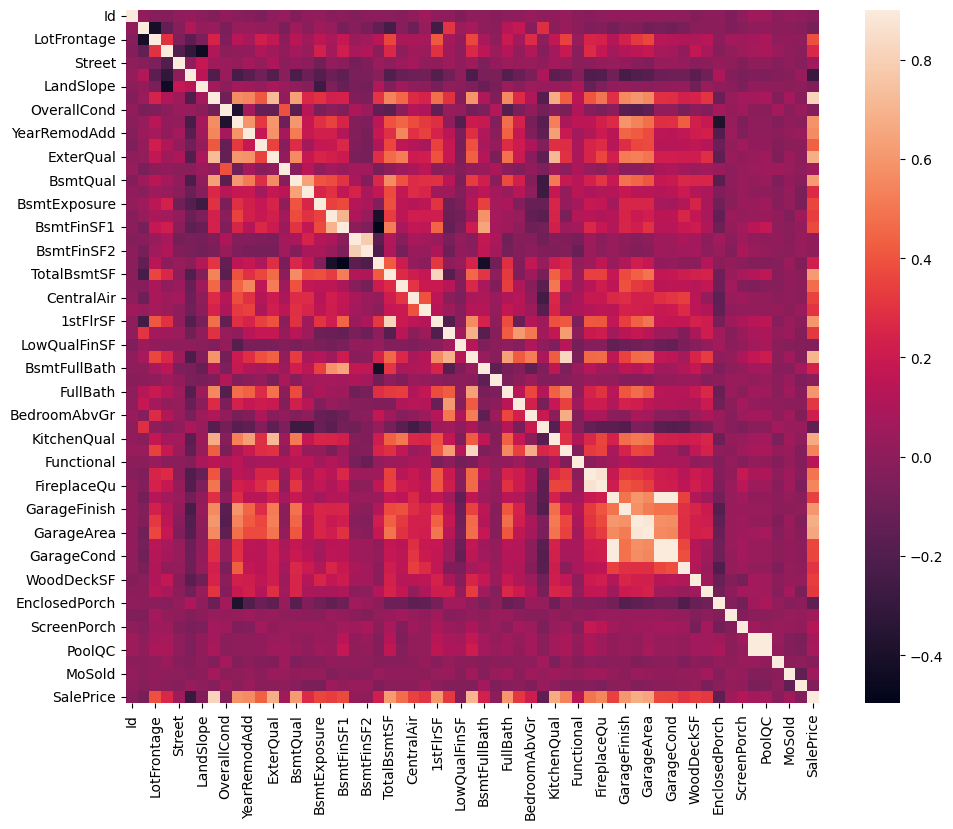

In [ ]:
corrm = Traindf.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrm, vmax=0.9, square=True)

In [ ]:
Traindf['Utilities'].value_counts()

AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
Traindf.drop(columns='Utilities',inplace=True)

In [ ]:
Testdf.drop(columns='Utilities',inplace=True)

In [ ]:
Testdf.shape

(1434, 78)

In [ ]:
Traindf.shape

(1451, 79)

In [ ]:
Traindf = pd.get_dummies(Traindf)
print(Traindf.shape)

(1451, 220)


In [ ]:
Testdf = pd.get_dummies(Testdf)
print(Testdf.shape)

(1434, 204)


In [ ]:
#Traindf['SaleType'].value_counts()

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
x_train = Traindf.drop(['SalePrice','Id'],axis=1)# create a new datafeam without Saleprice which is our training data
y_train = Traindf['SalePrice']

In [ ]:
all_data = pd.concat((Traindf, Testdf)).reset_index(drop=True)

In [ ]:
ntrain = Traindf.shape[0]
ntest = Testdf.shape[0]
y_train = Traindf.SalePrice.values

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2885, 219)


In [ ]:
train.shape

(1451, 220)

In [ ]:
test

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1451,1461,20,80.0,11622,2,3,2,5,6,1961,...,0,0,0,1,0,0,0,0,1,0
1452,1462,20,81.0,14267,2,2,2,6,6,1958,...,0,0,0,1,0,0,0,0,1,0
1453,1463,60,74.0,13830,2,2,2,5,5,1997,...,0,0,0,1,0,0,0,0,1,0
1454,1464,60,78.0,9978,2,2,2,6,6,1998,...,0,0,0,1,0,0,0,0,1,0
1455,1465,120,43.0,5005,2,2,2,8,5,1992,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,2915,160,21.0,1936,2,3,2,4,7,1970,...,0,0,0,1,0,0,0,0,1,0
2881,2916,160,21.0,1894,2,3,2,4,5,1970,...,0,0,0,1,1,0,0,0,0,0
2882,2917,20,160.0,20000,2,3,2,5,7,1960,...,0,0,0,1,1,0,0,0,0,0
2883,2918,85,62.0,10441,2,3,2,5,5,1992,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,  random_state =7, nthread = -1)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0007 (0.0000)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0006 (0.0000)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0489 (0.0048)



In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.037840387812587084


In [ ]:
X = Traindf.drop(columns = ['SalePrice'])
y = Traindf['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0231


In [ ]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.096 (0.008)


In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=80)

<Figure size 960x960 with 0 Axes>

<Figure size 960x960 with 0 Axes>

In [ ]:
from matplotlib import pyplot
w=list(Traindf.columns.values)
model = XGBRegressor()
# fit the model
model.fit(X, y)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 #print('Feature: %0d, Score: %.5f' v)
 if v > .05:
  print('Feature: %s, Score: %.5f' % (w[i],v))

# plot feature importance
#pyplot.bar([w[x] for x in range(len(importance))], importance)
#pyplot.show()

Feature: OverallQual, Score: 0.27653
Feature: CentralAir, Score: 0.05942
Feature: KitchenQual, Score: 0.07707
Feature: GarageCars, Score: 0.12884


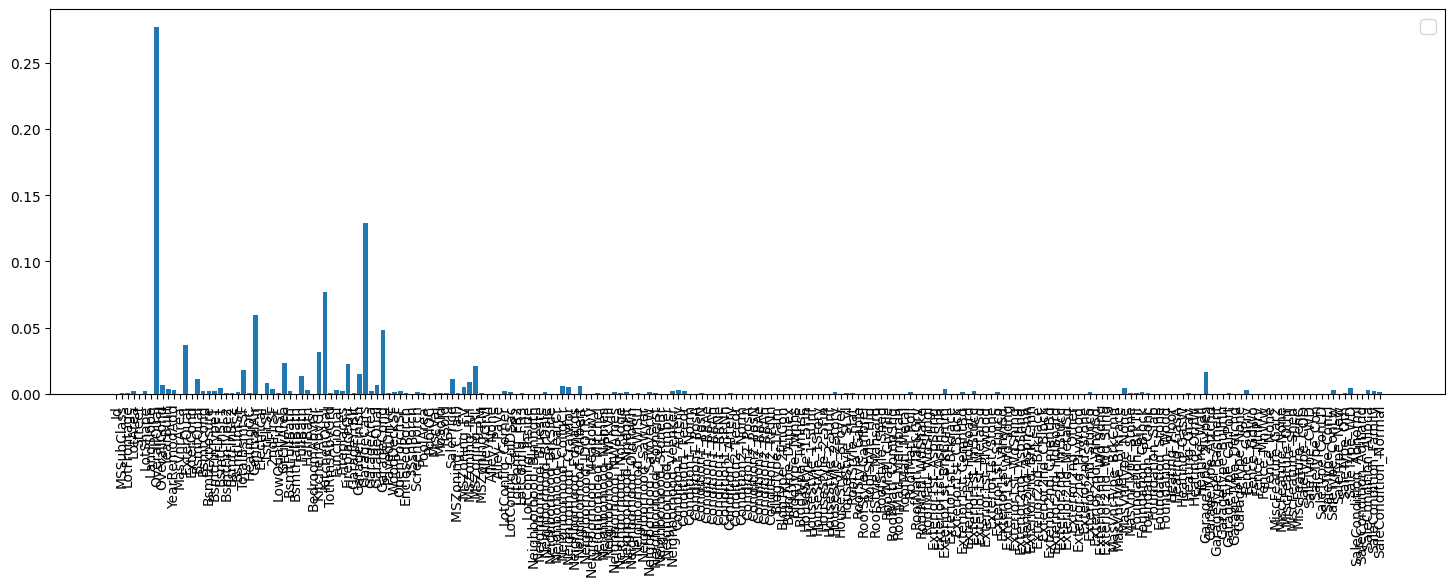

In [ ]:
f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
pyplot.bar([w[x] for x in range(len(importance))], importance)
plt.xticks([w[x] for x in range(len(importance))], rotation='vertical')
ax.legend(fontsize = 14)
pyplot.show()

In [ ]:
 print('Feature: ', w[i], ' Score: ', float(v))


Feature:  SaleCondition_Normal  Score:  0.0014694067649543285


In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, Traindf[['SalePrice']]], axis = 1)
finalDf

,principal component 1,principal component 2,SalePrice
0,3.184001,-1.559767,12.247694
1,0.046305,2.920047,12.109011
2,3.766816,-1.235176,12.317167
3,-1.360080,-1.031052,11.849398
4,5.679233,-0.990053,12.429216
...,...,...,...
1455,NaN,NaN,12.072541
1456,NaN,NaN,12.254863
1457,NaN,NaN,12.493130
1458,NaN,NaN,11.864462
